# CS381/780 Data Analytics Final Project

### Due on 12/9/2020 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on data provided by LendingClub 

https://www.lendingclub.com
    
### The dataset was provided by Kaggle and contains information on loan borrowers 
collected by LendingClub from the year 2007 to 2010. 



Listing of attributes:
    
* credit.policy: a set of guidelines and criteria that decides on credit limits, credit terms, and how to go about delinquent accounts. The borrower either meets the criteria (represented by the integer 1 in our data) or does not (represented by 0 in our data).
* purpose: purpose of the loan contracted (a.i: installment, debt consolidation)
* int.rate: interest rate on the loan.
* installment: monthly payment owed by the borrower.
* log.annual.inc: natural logarithm of self-reported income.
* dti: Debt-to-Income ratio
* fico: FICO score of loan borrowers
* days.with.cr.line: number of days with line of credit.
* revol.bal: revolving balance or the portion of credit that remains unpaid after billing cycle.
* revol.util: revolving utilization or debt-to-limit ratio, debt divided by credit limit.
* inq.last.6mths: inquiries during last 6 months. Inquiries happen when a financial institution checks your credit to make a lending decision, this usually happens when you apply for credit. There are two types of inquiries: hard inquiries or ‘hard pulls’ when you apply for mortgage, credit card… and soft inquiries or ‘soft pulls’ for credit card offers or employment. For the purpose of this project, we will consider the data to represent ‘hard pulls’.
* delinq.2yrs: number of loan delinquencies (30 days or more past due on a payment) reported during the past 2 years.
* pub.rec: number of derogatory public records of loan borrowers.
* not.fully.paid: this column shows whether a loan was not fully paid (1) or fully paid (0)

### Your task in the final project is build the best predictive model to predict what type of borrower will be more likely to default (i.e not fully paid back their loan)

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped 100



### Make sure your work include the following steps

* EDA (checking missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


In [4]:
df = pd.read_csv("lendingclub_loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


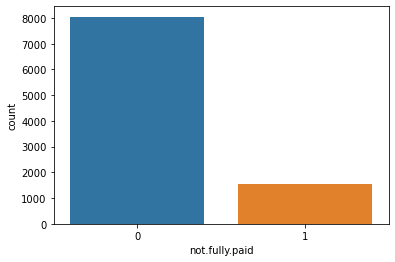

In [5]:
sns.countplot(df['not.fully.paid'])

### Good Luck !!!

## Step 1: EDA 
### Checking missing values 

In [6]:
df.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment           True
log.annual.inc        True
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [7]:
df = df[~np.isnan(df['installment'])]
df.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

* Removing missing values from the 'installment' attribute also removed the missing values from the 'log.annual.inc' attribute

### Removing outliers

In [8]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9580.000000,9580.000000,9580.000000,9580.000000,9580.000000,9580.000000,9580.000000,9.580000e+03,9580.000000,9580.000000,9580.000000,9580.000000,9580.000000
mean,0.805010,0.122642,319.075737,10.932306,12.605959,710.807411,4560.712339,1.691150e+04,46.793265,1.577557,0.163883,0.062109,0.160021
std,0.396213,0.026845,207.051846,0.614887,6.883431,38.674520,2496.672583,3.375310e+04,29.014330,2.200024,0.546292,0.262100,0.366645
min,0.000000,0.060000,15.670000,7.547502,0.000000,50.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.217500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.929887,12.660000,707.000000,4139.958333,8.593000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.487500,11.294769,17.950000,737.000000,5730.000000,1.824450e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,999.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### Attribute: credit.policy

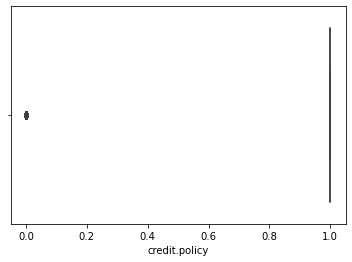

In [9]:
sns.boxplot(x = df['credit.policy']) 

* Since the attribute 'credit.policy' can only have the values of 0 or 1, I should not consider 0 as an outlier.

#### Attribute: int.rate

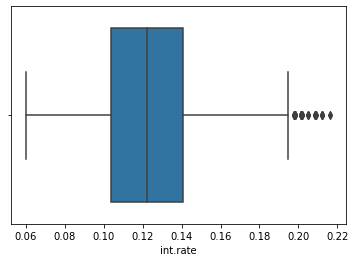

In [10]:
sns.boxplot(x = df['int.rate']) 

* The attribute 'int.rate' represents the interest rate on the loan. The boxplot shows a few outliers. However, I am choosing to not remove theses outlier values because the outlier values does not have big gap from itself to the value closest to itself. Since my goal is to build the best predictive model to predict what type of borrower will be more likely to default (i.e not fully paid back their loan), I believe that removing borrowers with a high installment will not be a good decision because the borrowers that has a high interest rate on their loan may be the borrowers that do not full pay their loan.

#### Attribute: installment

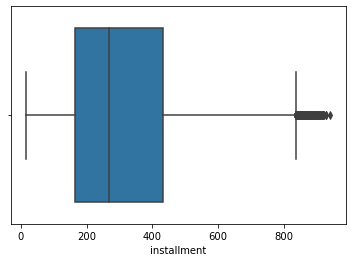

In [11]:
sns.boxplot(x = df['installment']) 

* The attribute 'installment' represents the monthly payment owed by the borrower. The boxplot shows many outliers above about 820. However, I am choosing to not consider theses emove theses outlier values because there are so many of them shown without a huge gap inbetween them. If I decide to remove them all, then I will be removing many borrowers with high monthly payments due. Since my goal is to build the best predictive model to predict what type of borrower will be more likely to default (i.e not fully paid back their loan), I believe that removing borrowers with a high installment will not be a good decision because the borrowers that has a high monthly payment due may be the borrowers that do not full pay their loan.

#### Attribute: log.annual.inc

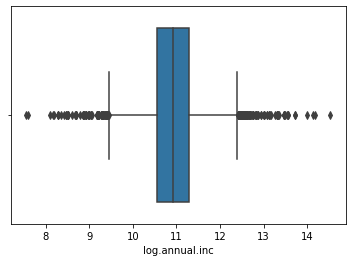

In [12]:
sns.boxplot(x = df['log.annual.inc']) 

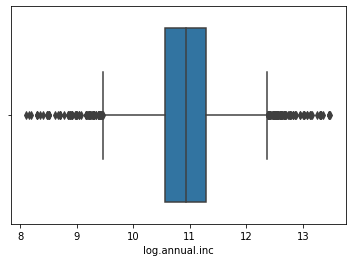

In [13]:
df = df[df['log.annual.inc'] > 8]
df = df[df['log.annual.inc'] < 13.5]
sns.boxplot(x = df['log.annual.inc'])

* I have decided to only remove the outlier values that has a big gap from itself to the value closest to itself that is shown by the boxplot.

#### Attribute: dti

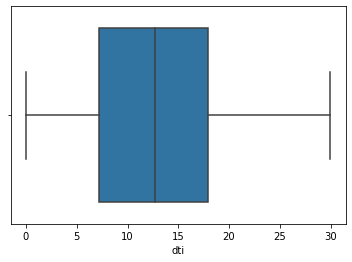

In [14]:
sns.boxplot(x = df['dti']) 

* There are no outliers shown by the boxplot.

#### Attribute: fico

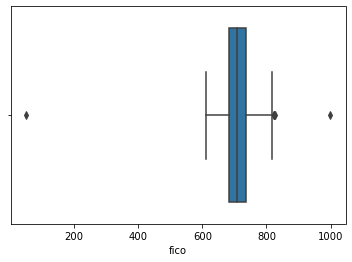

In [15]:
sns.boxplot(x = df['fico']) 

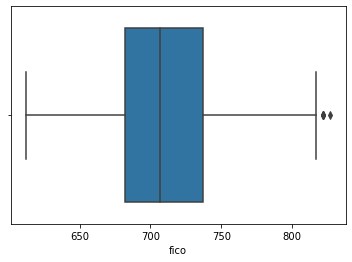

In [16]:
df = df[df['fico'] > 200]
df = df[df['fico'] < 900]
sns.boxplot(x = df['fico']) 

* I have decided to only remove the outlier values that has a big gap from itself to the value closest to itself that is shown by the boxplot.

#### Attribute: days.with.cr.line

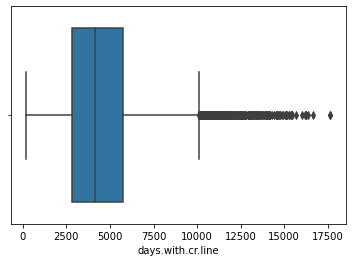

In [17]:
sns.boxplot(x = df['days.with.cr.line']) 

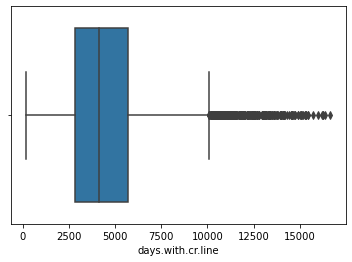

In [18]:
df = df[df['days.with.cr.line'] < 17500]
sns.boxplot(x = df['days.with.cr.line']) 

* I have decided to only remove the outlier values that has a big gap from itself to the value closest to itself that is shown by the boxplot.

#### Attribute: revol.bal

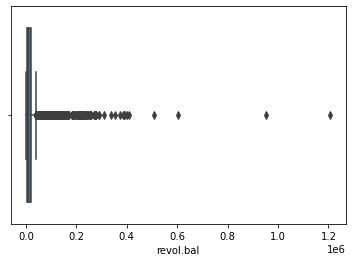

In [19]:
sns.boxplot(x = df['revol.bal']) 

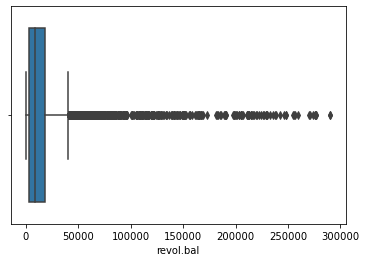

In [20]:
df = df[df['revol.bal'] < 300000]
sns.boxplot(x = df['revol.bal']) 

* I have decided to only remove the outlier values that has a big gap from itself to the value closest to itself that is shown by the boxplot.

#### Attribute: revol.util

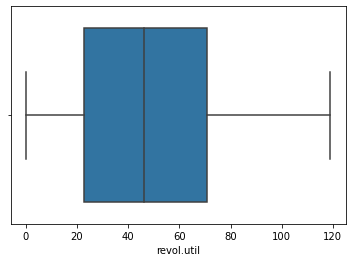

In [21]:
sns.boxplot(x = df['revol.util'])

* There are no outliers shown by the boxplot.

#### Attribute: inq.last.6mths

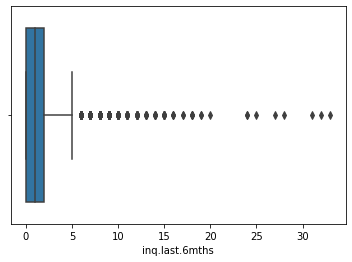

In [22]:
sns.boxplot(x = df['inq.last.6mths'])

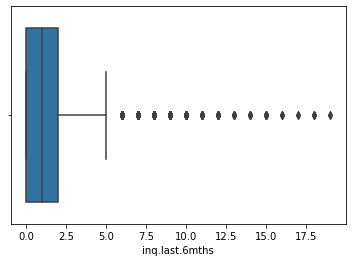

In [23]:
df = df[df['inq.last.6mths'] < 20]
sns.boxplot(x = df['inq.last.6mths']) 

* I have decided to only remove the outlier values that has a big gap from itself to the value closest to itself that is shown by the boxplot.

#### Attribute: delinq.2yrs

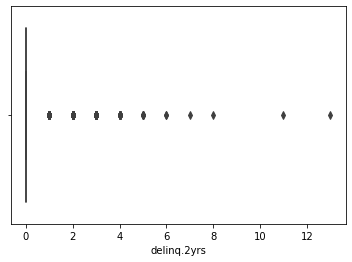

In [24]:
sns.boxplot(x = df['delinq.2yrs'])

* The attribute 'delinq.2yrs' represents number of loan delinquencies (30 days or more past due on a payment) reported during the past 2 years. Since most borrowers has a 0 loan delinquencies reported during the past 2 years. I decided to not remove the few outliers of borrowers with at least 1 loan delinquencies reported during the past 2 years or else every borrower in the data will have 0 loan delinquencies reported during the past 2 years. 

#### Attribute: pub.rec	

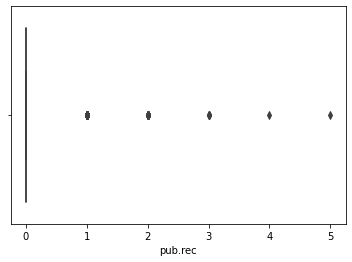

In [25]:
sns.boxplot(x = df['pub.rec'])

* The attribute 'pub.rec' represents the number of derogatory public records of loan borrowers. Since most borrowers has a 0 derogatory public records. I decided to not remove the few outliers of borrowers with at least 1 derogatory public records or else every borrower in the data will have 0 derogatory public records.

#### Attribute: not.fully.paid

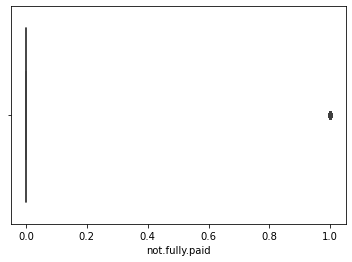

In [26]:
sns.boxplot(x = df['not.fully.paid'])

* Since the attribute 'not.fully.paid' can only have the values of 0 or 1, I should not consider 1 as an outlier.

## Step 2: Performed basic exploration of relationship, with plots and graphs

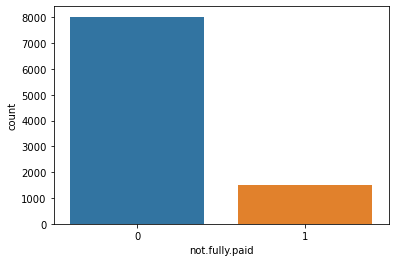

In [27]:
sns.countplot(df['not.fully.paid'])

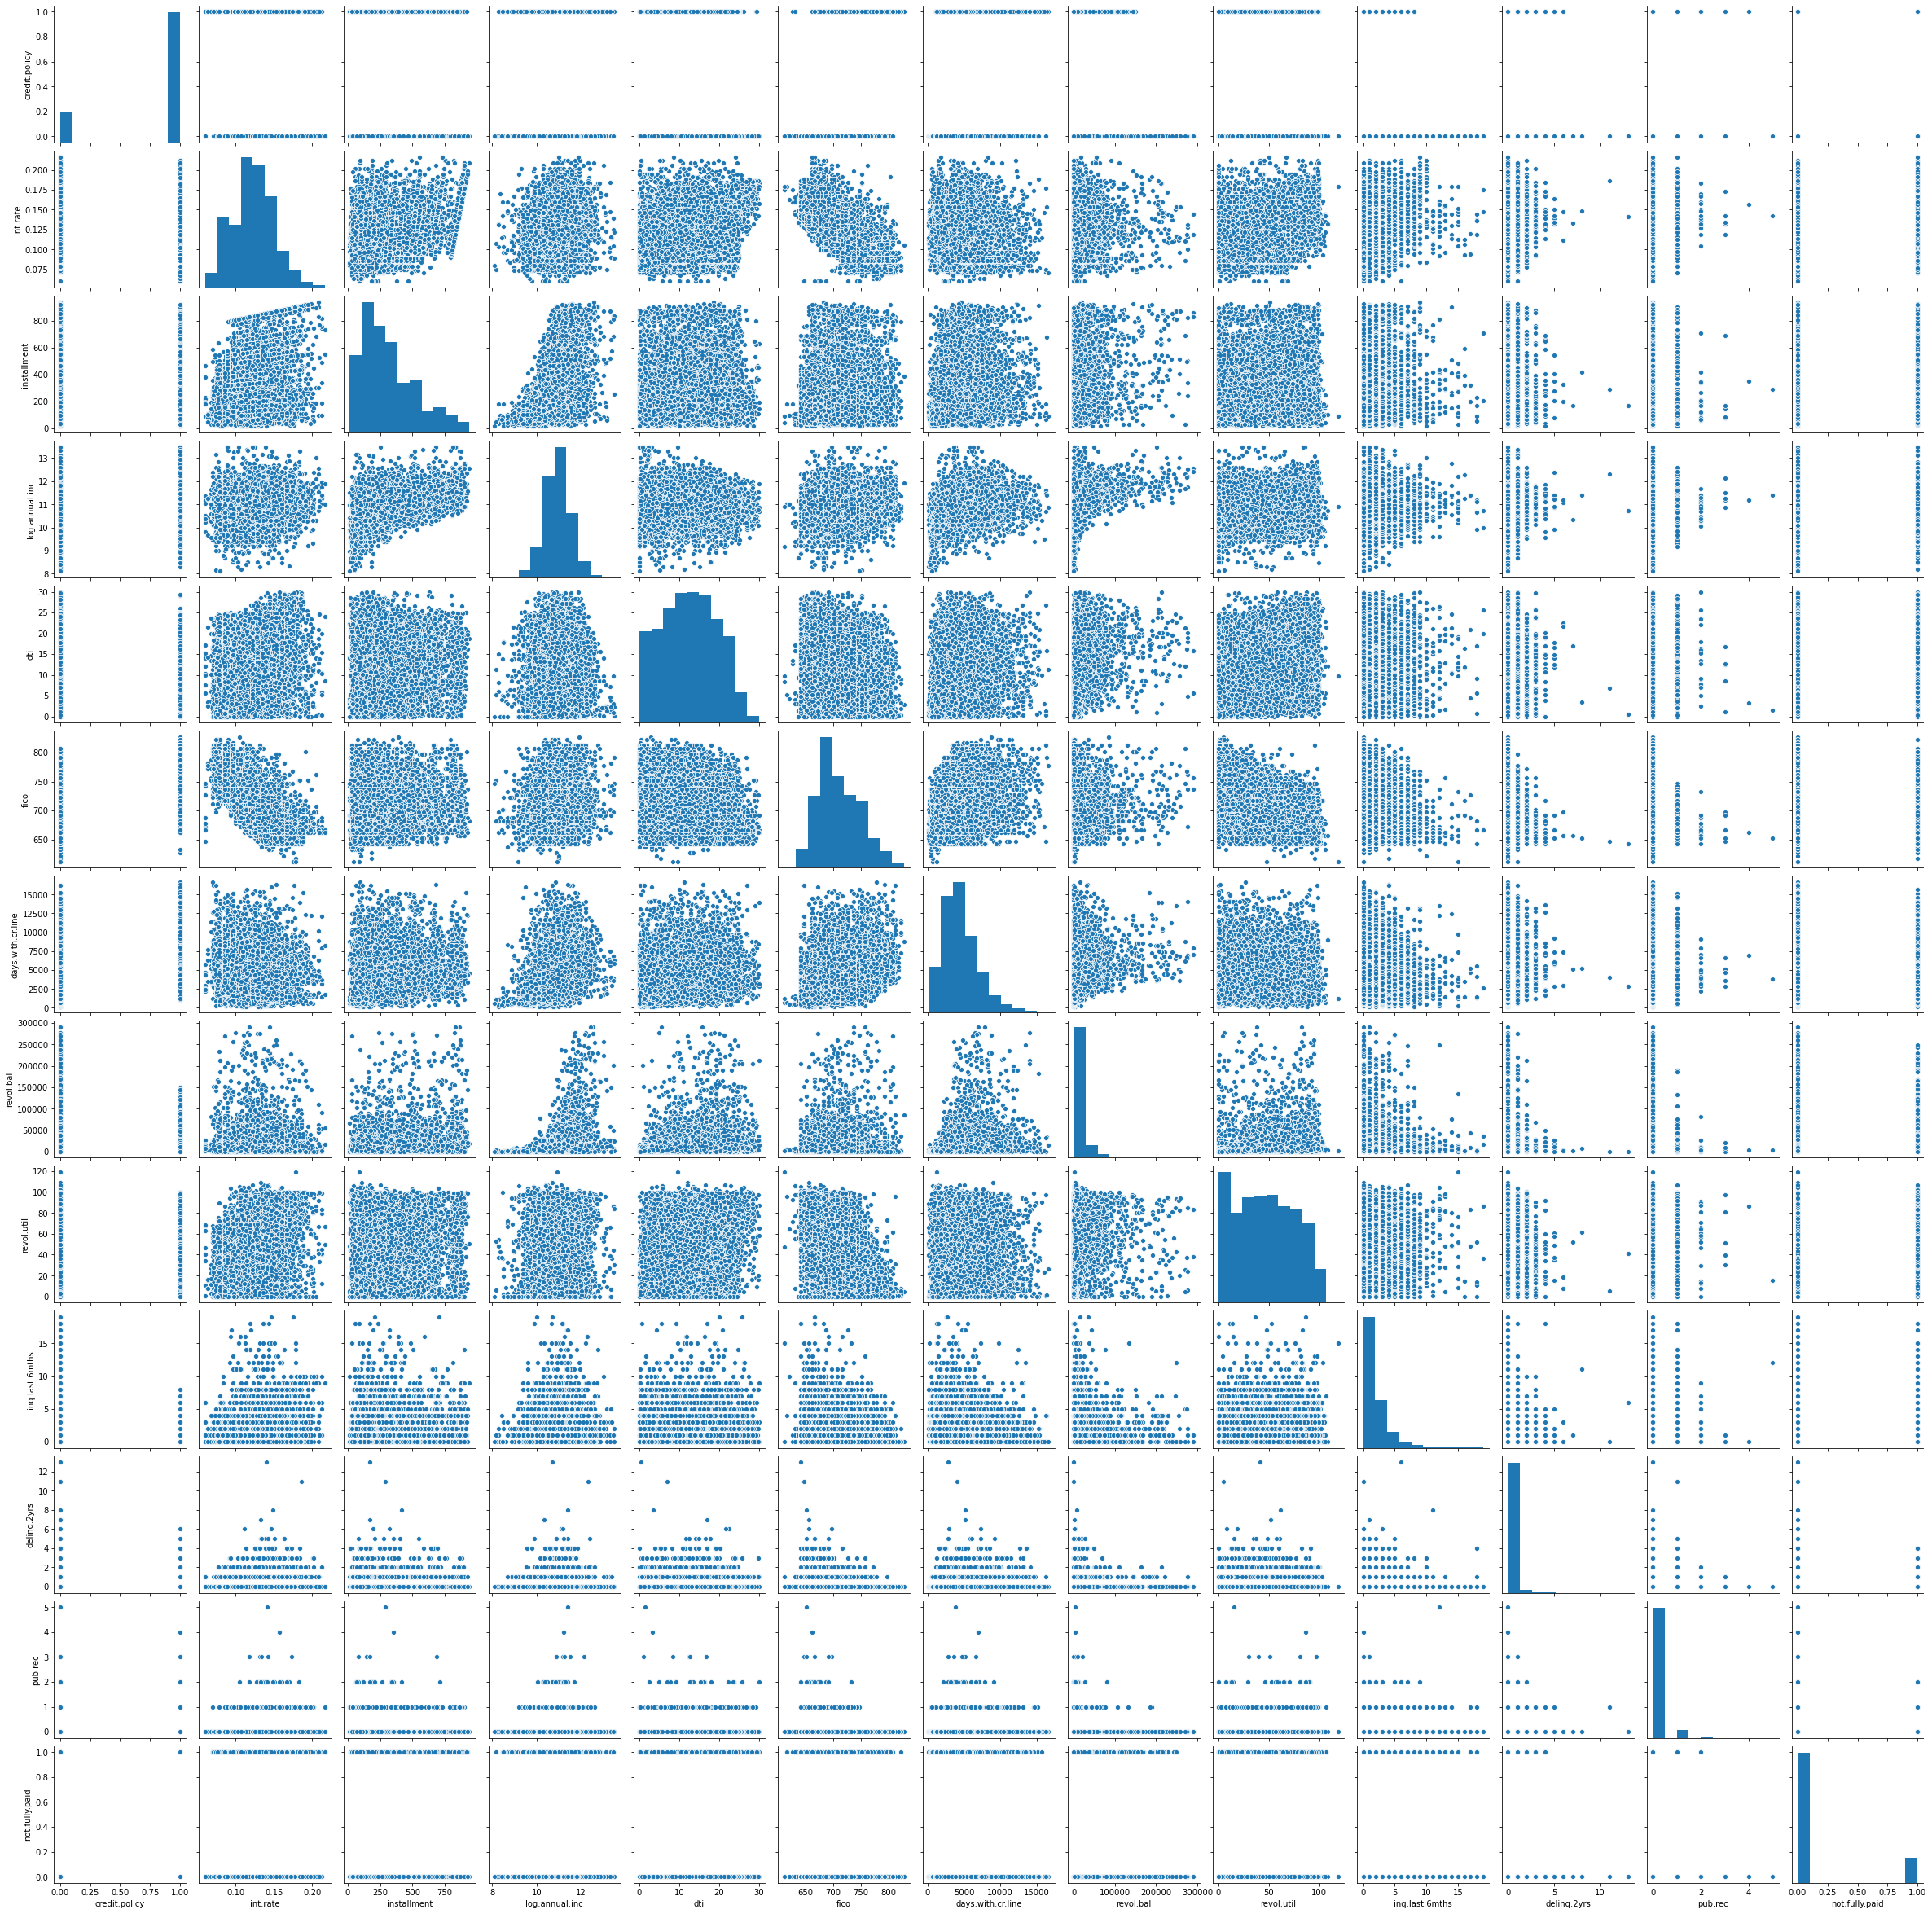

In [28]:
sns.pairplot(data = df)

In [29]:
df.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.293099,0.061433,0.038265,-0.089359,0.346976,0.102570,-0.186106,-0.102970,-0.552128,-0.077823,-0.054369,-0.155201
int.rate,-0.293099,1.000000,0.275574,0.058922,0.218797,-0.715269,-0.125411,0.091496,0.464140,0.214149,0.156382,0.098645,0.159452
installment,0.061433,0.275574,1.000000,0.452177,0.048882,0.085063,0.179655,0.255024,0.080687,-0.002450,-0.004532,-0.031834,0.048005
log.annual.inc,0.038265,0.058922,0.452177,1.000000,-0.049068,0.112550,0.336440,0.408289,0.057705,0.036788,0.031314,0.016137,-0.034156
dti,-0.089359,0.218797,0.048882,-0.049068,1.000000,-0.240822,0.059527,0.229837,0.336340,0.029229,-0.021899,0.006804,0.036503
fico,0.346976,-0.715269,0.085063,0.112550,-0.240822,1.000000,0.264136,-0.014170,-0.541859,-0.182304,-0.217038,-0.147714,-0.149616
days.with.cr.line,0.102570,-0.125411,0.179655,0.336440,0.059527,0.264136,1.000000,0.252816,-0.024267,-0.037767,0.081810,0.072738,-0.031250
revol.bal,-0.186106,0.091496,0.255024,0.408289,0.229837,-0.014170,0.252816,1.000000,0.240189,0.009903,-0.037089,-0.041596,0.045472
revol.util,-0.102970,0.464140,0.080687,0.057705,0.336340,-0.541859,-0.024267,0.240189,1.000000,-0.013631,-0.042582,0.067689,0.082868
inq.last.6mths,-0.552128,0.214149,-0.002450,0.036788,0.029229,-0.182304,-0.037767,0.009903,-0.013631,1.000000,0.026285,0.075217,0.150939


* Based on the correlations, int.rate affects not.fully.paid the most

## Step 3: Normalize numerical features if needed

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
numerical_features = df[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']]
numerical_features.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [32]:
scaler = StandardScaler()
normalized_df = scaler.fit_transform(numerical_features)
normalized_df = pd.DataFrame(normalized_df, index = df.index, columns = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec'])
normalized_df.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,-0.138867,2.468733,0.699839,0.998384,0.688195,0.436150,0.470342,0.182729,-0.756235,-0.300172,-0.236738
1,-0.578595,-0.438541,0.255423,0.243888,-0.102301,-0.722496,0.648211,1.030873,-0.756235,-0.300172,-0.236738
2,0.487187,0.232249,-0.918557,-0.142810,-0.761049,0.062015,-0.474878,-0.730922,-0.269045,-0.300172,-0.236738
3,-0.813366,-0.757293,0.699839,-0.655984,0.029448,-0.746652,0.649852,0.910202,-0.269045,-0.300172,-0.236738
4,0.744316,-1.044788,0.615890,0.342743,-1.156297,-0.197075,-0.429040,-0.251686,-0.756235,1.527872,-0.236738


In [33]:
df2 = df[['credit.policy', 'not.fully.paid']]
df2 = pd.concat([df2, normalized_df], axis=1)
df2.head()

,credit.policy,not.fully.paid,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0,-0.138867,2.468733,0.699839,0.998384,0.688195,0.436150,0.470342,0.182729,-0.756235,-0.300172,-0.236738
1,1,0,-0.578595,-0.438541,0.255423,0.243888,-0.102301,-0.722496,0.648211,1.030873,-0.756235,-0.300172,-0.236738
2,1,0,0.487187,0.232249,-0.918557,-0.142810,-0.761049,0.062015,-0.474878,-0.730922,-0.269045,-0.300172,-0.236738
3,1,0,-0.813366,-0.757293,0.699839,-0.655984,0.029448,-0.746652,0.649852,0.910202,-0.269045,-0.300172,-0.236738
4,1,0,0.744316,-1.044788,0.615890,0.342743,-1.156297,-0.197075,-0.429040,-0.251686,-0.756235,1.527872,-0.236738


## Step 4: Setup dummy variables to take care categorical variables

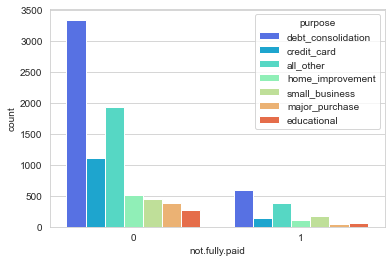

In [34]:
sns.set_style('whitegrid')
sns.countplot(x = 'not.fully.paid', hue = 'purpose', data = df, palette = 'rainbow')

In [35]:
purpose = pd.get_dummies(df['purpose'], drop_first = True)
df2 = pd.concat([df2, purpose], axis = 1)
df2

,credit.policy,not.fully.paid,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0,-0.138867,2.468733,0.699839,0.998384,0.688195,0.436150,0.470342,0.182729,-0.756235,-0.300172,-0.236738,0,1,0,0,0,0
1,1,0,-0.578595,-0.438541,0.255423,0.243888,-0.102301,-0.722496,0.648211,1.030873,-0.756235,-0.300172,-0.236738,1,0,0,0,0,0
2,1,0,0.487187,0.232249,-0.918557,-0.142810,-0.761049,0.062015,-0.474878,-0.730922,-0.269045,-0.300172,-0.236738,0,1,0,0,0,0
3,1,0,-0.813366,-0.757293,0.699839,-0.655984,0.029448,-0.746652,0.649852,0.910202,-0.269045,-0.300172,-0.236738,0,1,0,0,0,0
4,1,0,0.744316,-1.044788,0.615890,0.342743,-1.156297,-0.197075,-0.429040,-0.251686,-0.756235,1.527872,-0.236738,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9576,0,1,0.874744,0.125321,2.075426,-0.323075,-1.024547,2.380950,7.426918,1.217051,0.218146,-0.300172,-0.236738,0,0,0,0,0,0
9577,0,1,0.099630,-0.295906,0.354356,-1.802994,0.292947,-0.070748,-0.598966,-1.575618,1.679716,-0.300172,-0.236738,0,0,0,0,0,0
9578,0,1,-0.578595,-1.069512,-0.548888,0.069437,-0.629299,-0.444883,-0.231515,1.244633,3.141287,-0.300172,-0.236738,0,1,0,0,0,0
9579,0,1,1.392730,0.158319,-0.179220,0.954772,-0.497550,-1.108717,-0.605828,-1.503216,1.679716,-0.300172,-0.236738,0,0,0,1,0,0


## Step 5: Separated data set into training and testing

In [36]:
X = df2.drop('not.fully.paid', axis = 1)
Y = df2['not.fully.paid']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 101)

## Step 6: Test different models and perform cross-validations
### Test Logisitic Regression model 

In [37]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
predictions = model1.predict(X_test)
print(classification_report(Y_test, predictions))
print("accuracy score: ", accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91      1589
           1       0.33      0.01      0.02       320

    accuracy                           0.83      1909
   macro avg       0.58      0.50      0.47      1909
weighted avg       0.75      0.83      0.76      1909

accuracy score:  0.8302776322682033


In [38]:
import random
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(classification_report(Y_test, predictions))
    print("accuracy score: ", accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1598
           1       0.31      0.02      0.03       311

    accuracy                           0.83      1909
   macro avg       0.58      0.50      0.47      1909
weighted avg       0.75      0.83      0.77      1909

accuracy score:  0.8339444735463594
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1603
           1       0.55      0.04      0.07       306

    accuracy                           0.84      1909
   macro avg       0.70      0.52      0.49      1909
weighted avg       0.80      0.84      0.78      1909

accuracy score:  0.8407543216343636
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1619
           1       0.44      0.03      0.05       290

    accuracy                           0.85      1909
   macro avg       0.65      0.51      0.48      1909
we

### Test SVM model

In [39]:
model2 = svm.SVC(kernel='rbf', gamma=0.1)
model2.fit(X_train,Y_train)
predictions2 = model2.predict(X_test)
print(classification_report(Y_test, predictions2))
print("accuracy score: ", accuracy_score(Y_test, predictions2))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1607
           1       0.50      0.00      0.01       302

    accuracy                           0.84      1909
   macro avg       0.67      0.50      0.46      1909
weighted avg       0.79      0.84      0.77      1909

accuracy score:  0.8418019905709796


In [40]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = svm.SVC(kernel='rbf', gamma=0.1)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(classification_report(Y_test, predictions))
    print("accuracy score: ", accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1599
           1       0.50      0.00      0.01       310

    accuracy                           0.84      1909
   macro avg       0.67      0.50      0.46      1909
weighted avg       0.78      0.84      0.76      1909

accuracy score:  0.8376113148245155
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1607
           1       0.50      0.00      0.01       302

    accuracy                           0.84      1909
   macro avg       0.67      0.50      0.46      1909
weighted avg       0.79      0.84      0.77      1909

accuracy score:  0.8418019905709796
              precision    recall  f1-score   support

           0       0.84      1.00      0.92      1611
           1       0.67      0.01      0.01       298

    accuracy                           0.84      1909
   macro avg       0.76      0.50      0.46      1909
we

### Test Decision Tree model

In [41]:
model3 = DecisionTreeClassifier(criterion='gini')
model3.fit(X_train,Y_train)
predictions3 = model3.predict(X_test)
print(classification_report(Y_test, predictions3))
print("accuracy score: ", accuracy_score(Y_test, predictions3))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1592
           1       0.23      0.26      0.24       317

    accuracy                           0.73      1909
   macro avg       0.54      0.54      0.54      1909
weighted avg       0.74      0.73      0.74      1909

accuracy score:  0.7297014143530645


In [42]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = DecisionTreeClassifier(criterion='gini')
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(classification_report(Y_test, predictions))
    print("accuracy score: ", accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1593
           1       0.25      0.26      0.25       316

    accuracy                           0.75      1909
   macro avg       0.55      0.55      0.55      1909
weighted avg       0.75      0.75      0.75      1909

accuracy score:  0.7459402828706129
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1601
           1       0.22      0.25      0.24       308

    accuracy                           0.74      1909
   macro avg       0.54      0.54      0.54      1909
weighted avg       0.75      0.74      0.74      1909

accuracy score:  0.7391304347826086
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1597
           1       0.20      0.21      0.21       312

    accuracy                           0.73      1909
   macro avg       0.52      0.52      0.52      1909
we

### Test Random Forest model

In [43]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(Y_test, rfc_pred))
print("accuracy score: ", accuracy_score(Y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1596
           1       0.55      0.02      0.04       313

    accuracy                           0.84      1909
   macro avg       0.69      0.51      0.47      1909
weighted avg       0.79      0.84      0.77      1909

accuracy score:  0.8365636458878994


In [44]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(classification_report(Y_test, predictions))
    print("accuracy score: ", accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1606
           1       0.60      0.02      0.04       303

    accuracy                           0.84      1909
   macro avg       0.72      0.51      0.48      1909
weighted avg       0.80      0.84      0.78      1909

accuracy score:  0.8423258250392875
              precision    recall  f1-score   support

           0       0.85      1.00      0.91      1608
           1       0.50      0.03      0.05       301

    accuracy                           0.84      1909
   macro avg       0.67      0.51      0.48      1909
weighted avg       0.79      0.84      0.78      1909

accuracy score:  0.8423258250392875
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1612
           1       0.60      0.02      0.04       297

    accuracy                           0.85      1909
   macro avg       0.72      0.51      0.48      1909
we

### The Decision Tree model gave the best F1-score